In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
import zipfile

with zipfile.ZipFile('test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_images')

In [ ]:
import zipfile

with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_images')

In [ ]:
# Step 1: Data Preparation
# Define directories for training and validation
train_dir = '/content/extracted_images/train'
test_dir = '/content/extracted_images/test1'

In [20]:
# Step 2: Data Augmentation and Preprocessing
# Image data generator with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/content/extracted_images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification
)


# Flow test images in batches of 32 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    '/content/extracted_images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 37500 images belonging to 2 classes.
Found 37500 images belonging to 2 classes.


In [21]:
# Step 3: Model Building
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: cat or dog
])

In [22]:
# Step 4: Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
# Step 5: Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=test_generator,
    validation_steps=50
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.6762 - loss: 0.6423 - val_accuracy: 0.6444 - val_loss: 0.6564
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.6576 - loss: 0.6450 - val_accuracy: 0.6725 - val_loss: 0.6447
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.6650 - loss: 0.6442 - val_accuracy: 0.6562 - val_loss: 0.6449
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.6453 - loss: 0.6527 - val_accuracy: 0.6731 - val_loss: 0.6315
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.6662 - loss: 0.6403 - val_accuracy: 0.6744 - val_loss: 0.6318
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.6625 - loss: 0.6421 - val_accuracy: 0.6662 - val_loss: 0.6394
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.6518 - loss: 0.6478 - val_accuracy: 0.6694 - val_loss: 0.6417
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.6721 - loss: 0.6342 - val_accuracy: 0.680

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.6685 - loss: 0.6378 - val_accuracy: 0.6606 - val_loss: 0.6426
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.6573 - loss: 0.6442 - val_accuracy: 0.6538 - val_loss: 0.6463
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.6618 - loss: 0.6410 - val_accuracy: 0.6800 - val_loss: 0.6291
Epoch 15/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.6766 - loss: 0.6316 - val_accuracy: 0.6525 - val_loss: 0.6465
Epoch 16/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.6705 - loss: 0.6361 - val_accuracy: 0.6750 - val_loss: 0.6323
Epoch 17/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.6648 - loss: 0.6388 - val_accuracy: 0.6856 - val_loss: 0.6229
Epoch 18/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.6489 - loss: 0.6495 - val_accuracy: 0.6637 - val_loss: 0.6397
Epoch 19/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.6684 - loss: 0.6371 - val_accuracy

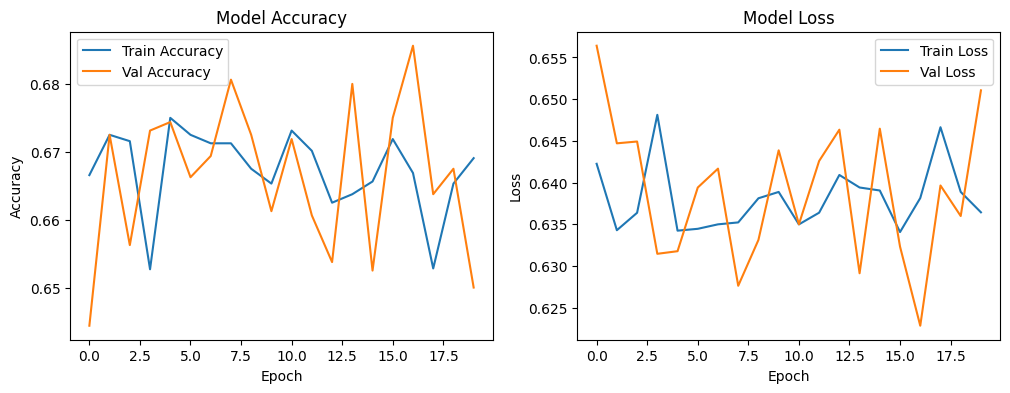

In [24]:
# Step 6: Evaluation
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# Step 7: Prediction
import numpy as np
from tensorflow.keras.preprocessing import image

In [27]:
# Load and preprocess a single image
img_path = '/content/extracted_images/test1/100.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # Normalize to [0, 1]

In [28]:
# Predict the class
prediction = model.predict(img_tensor)

print("Prediction (1 = dog, 0 = cat):", int(prediction[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Prediction (1 = dog, 0 = cat): 0
